In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
tab = binomial_test_screen(matched_tn, fc=1.)

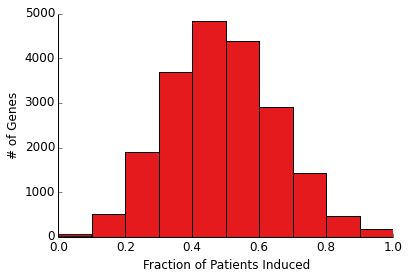

In [3]:
fig, ax = subplots(figsize=(6,4))
tab.frac.hist(ax=ax)
ax.set_xlabel('Fraction of Patients Induced')
ax.set_ylabel('# of Genes')
prettify_ax(ax)

In [4]:
tab.sort('p').head(10)

,num_ox,num_dx,frac,p
ADH1B,29,669,0.04,4.52e-151
IQGAP3,636,669,0.95,7.71e-146
FOXM1,635,669,0.95,1.44e-144
KIF4A,635,669,0.95,1.44e-144
GSTM5,36,669,0.05,4.63e-142
PKMYT1,633,669,0.95,4.63e-142
TROAP,631,669,0.94,1.32e-139
UBE2C,631,669,0.94,1.32e-139
ADH1A,38,665,0.06,1.67e-138
TPX2,628,669,0.94,5.20e-136


### Infer Missing Values with KNN

In [4]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()
pts = matched_tn.columns.get_level_values(0)
cancers_to_use = ti(codes.ix[pts].value_counts() > 15)

In [5]:
df_inf = {c: infer_normal_knn(rna_df.ix[:, ti(codes == c)], r_curtoff=.3, k=5)
          for c in cancers_to_use}
tn_inf_c = pd.concat(df_inf.values(), axis=1)

In [6]:
tab_inf = binomial_test_screen(tn_inf_c, fc=1.5)

In [7]:
tab_inf[tab_inf.num_dx > 1000].sort('frac').tail(10)

,num_ox,num_dx,frac,p
ASF1B,5300,5346,0.99,0.00e+00
TPX2,5437,5484,0.99,0.00e+00
MOGS,3152,3178,0.99,0.00e+00
UBE2C,5537,5582,0.99,0.00e+00
IQGAP3,5527,5571,0.99,0.00e+00
UHRF1,5495,5538,0.99,0.00e+00
FOXM1,5344,5385,0.99,0.00e+00
PKMYT1,5544,5585,0.99,4.94e-324
SNRPB,3824,3850,0.99,0.00e+00
C20orf20,3743,3751,1.00,0.00e+00


### Gene Set Enrichment

In [5]:
vec = tab_inf[tab_inf.num_dx > 1000].frac.ix[gene_sets.index] > .85
print vec.value_counts()
mm = run_mgsa(vec)
mm.sort('estimate', ascending=False).head(10)

NameError: name 'tab_inf' is not defined

In [28]:
vec = tab[tab.num_dx > 100].frac.ix[gene_sets.index] > .85
print vec.value_counts()
mm2 = run_mgsa(vec)

False    20308
True       194
dtype: int64


In [9]:
vec = tab_inf[tab_inf.num_dx > 1000].frac.ix[gene_sets.index] < .15
print vec.value_counts()
mm = run_mgsa(vec)
mm.sort('estimate', ascending=False).head(10)

False    18847
True      1655
dtype: int64


,inPopulation,inStudySet,estimate,std.error
KEGG_PROPANOATE_METABOLISM,32,15,0.92,0.02
REACTOME_SIGNALING_BY_BMP,23,8,0.92,0.01
BIOCARTA_RHO_PATHWAY,32,11,0.78,0.02
REACTOME_NUCLEAR_RECEPTOR_TRANSCRIPTION_PATHWAY,50,12,0.61,0.01
BIOCARTA_MET_PATHWAY,37,10,0.61,0.02
KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION,44,16,0.51,0.01
BIOCARTA_PGC1A_PATHWAY,23,9,0.47,0.01
BIOCARTA_VIP_PATHWAY,26,11,0.45,0.01
KEGG_FATTY_ACID_METABOLISM,42,14,0.40,0.01
BIOCARTA_LONGEVITY_PATHWAY,15,5,0.38,0.01


In [85]:
tab_lusc = binomial_test_screen(matched_tn.ix[:, ti(codes=='BRCA')], fc=1.5)

In [86]:
tab_lusc.sort('p').head()

,num_ox,num_dx,frac,p
COL10A1,111,111,1,7.70e-34
MMP11,111,111,1,7.70e-34
KIAA0101,110,110,1,1.54e-33
LRRC3B,0,110,0,1.54e-33
HLF,0,110,0,1.54e-33


In [87]:
vec = tab_lusc.frac.ix[gene_sets.index] > .85
print vec.value_counts()
mm_lusc = run_mgsa(vec)
mm_lusc.sort('estimate', ascending=False).head(10)

False    17494
True      3008
dtype: int64


,inPopulation,inStudySet,estimate,std.error
KEGG_N_GLYCAN_BIOSYNTHESIS,46,22,1.00,0.00
BIOCARTA_RANMS_PATHWAY,10,9,0.98,0.00
REACTOME_RNA_POLYMERASE_I_PROMOTER_OPENING,56,35,0.97,0.01
REACTOME_TRNA_AMINOACYLATION,40,21,0.96,0.00
REACTOME_MITOTIC_M_M_G1_PHASES,157,99,0.96,0.01
KEGG_PROTEIN_EXPORT,23,11,0.95,0.00
BIOCARTA_EIF2_PATHWAY,11,7,0.93,0.01
BIOCARTA_RAB_PATHWAY,12,7,0.92,0.01
REACTOME_FANCONI_ANEMIA_PATHWAY,15,9,0.88,0.01
KEGG_HOMOLOGOUS_RECOMBINATION,28,13,0.79,0.00


In [77]:
tab_rest = binomial_test_screen(matched_tn.ix[:, ti(codes!='BRCA')], fc=1.5)

In [81]:
vec = tab_rest.frac.ix[gene_sets.index] > .85
print vec.value_counts()
mm_rest = run_mgsa(vec)
mm_rest.sort('estimate', ascending=False).head(10)

False    19337
True      1165
dtype: int64


,inPopulation,inStudySet,estimate,std.error
REACTOME_CELL_CYCLE_MITOTIC,306,117,1.00,7.11e-04
KEGG_N_GLYCAN_BIOSYNTHESIS,46,12,1.00,8.25e-04
KEGG_HOMOLOGOUS_RECOMBINATION,28,10,1.00,7.09e-04
REACTOME_COPI_MEDIATED_TRANSPORT,10,6,0.99,3.13e-03
BIOCARTA_RANMS_PATHWAY,10,8,0.99,1.53e-03
REACTOME_EXTENSION_OF_TELOMERES,28,15,0.97,5.02e-03
REACTOME_FANCONI_ANEMIA_PATHWAY,15,7,0.95,1.85e-02
REACTOME_SEMA3A_PAK_DEPENDENT_AXON_REPULSION,15,5,0.95,9.08e-03
REACTOME_FORMATION_OF_TUBULIN_FOLDING_INTERMEDIATES_BY_CCT_TRIC,22,9,0.86,8.80e-03
BIOCARTA_GLYCOLYSIS_PATHWAY,10,4,0.81,2.10e-02


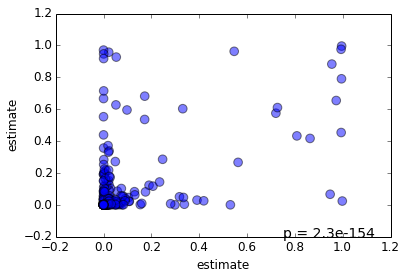

In [88]:
series_scatter(mm_rest.estimate, mm_lusc.estimate)

In [90]:
(mm_lusc.estimate - mm_rest.estimate).order()

REACTOME_CELL_CYCLE_MITOTIC                                    -0.97
REACTOME_SEMA3A_PAK_DEPENDENT_AXON_REPULSION                   -0.88
REACTOME_COPI_MEDIATED_TRANSPORT                               -0.54
KEGG_PYRIMIDINE_METABOLISM                                     -0.53
REACTOME_FORMATION_OF_TUBULIN_FOLDING_INTERMEDIATES_BY_CCT_TRIC   -0.45
KEGG_AMINOACYL_TRNA_BIOSYNTHESIS                               -0.39
BIOCARTA_GLYCOLYSIS_PATHWAY                                    -0.38
KEGG_DNA_REPLICATION                                           -0.36
KEGG_ONE_CARBON_POOL_BY_FOLATE                                 -0.33
REACTOME_EXTENSION_OF_TELOMERES                                -0.32
KEGG_LYSINE_DEGRADATION                                        -0.30
REACTOME_G2_M_CHECKPOINTS                                      -0.30
BIOCARTA_TNFR1_PATHWAY                                         -0.29
REACTOME_FORMATION_AND_MATURATION_OF_MRNA_TRANSCRIPT           -0.27
REACTOME_MICRORNA_BIOGENESIS   